<a href="https://colab.research.google.com/github/einius99/ImageClassificationCNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
print("train_images.shape:", train_images.shape)
print("test_images.shape", test_images.shape)

train_images.shape: (50000, 32, 32, 3)
test_images.shape (10000, 32, 32, 3)


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape= [32, 32, 3]))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape= [32, 32, 3]))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape= [32, 32, 3]))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=10, activation='softmax'))


model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=256, epochs=10, verbose=1)

Epoch 1/10
196/196 [==============================] - 5s 27ms/step - loss: 1.6966 - accuracy: 0.4707 - val_loss: 3.6219 - val_accuracy: 0.1809
Epoch 2/10
196/196 [==============================] - 5s 26ms/step - loss: 1.0070 - accuracy: 0.6425 - val_loss: 2.6729 - val_accuracy: 0.2724
Epoch 3/10
196/196 [==============================] - 5s 26ms/step - loss: 0.7747 - accuracy: 0.7257 - val_loss: 0.9272 - val_accuracy: 0.6752
Epoch 4/10
196/196 [==============================] - 5s 26ms/step - loss: 0.6319 - accuracy: 0.7769 - val_loss: 0.7260 - val_accuracy: 0.7511
Epoch 5/10
196/196 [==============================] - 5s 26ms/step - loss: 0.5174 - accuracy: 0.8161 - val_loss: 0.6519 - val_accuracy: 0.7753
Epoch 6/10
196/196 [==============================] - 5s 26ms/step - loss: 0.4220 - accuracy: 0.8516 - val_loss: 0.6682 - val_accuracy: 0.7785
Epoch 7/10
196/196 [==============================] - 5s 26ms/step - loss: 0.3458 - accuracy: 0.8784 - val_loss: 0.6872 - val_accuracy: 0.7761

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 16, 16, 64)       

In [10]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape= [32, 32, 3]))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(units=64, activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(units=10, activation='softmax'))

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=256, epochs=10, verbose=1)

Epoch 1/10
196/196 [==============================] - 2s 10ms/step - loss: 1.7675 - accuracy: 0.3586 - val_loss: 1.4331 - val_accuracy: 0.4926
Epoch 2/10
196/196 [==============================] - 2s 8ms/step - loss: 1.4177 - accuracy: 0.4909 - val_loss: 1.2678 - val_accuracy: 0.5537
Epoch 3/10
196/196 [==============================] - 2s 8ms/step - loss: 1.2822 - accuracy: 0.5430 - val_loss: 1.1608 - val_accuracy: 0.5957
Epoch 4/10
196/196 [==============================] - 2s 8ms/step - loss: 1.1962 - accuracy: 0.5761 - val_loss: 1.0851 - val_accuracy: 0.6192
Epoch 5/10
196/196 [==============================] - 2s 8ms/step - loss: 1.1156 - accuracy: 0.6047 - val_loss: 1.0697 - val_accuracy: 0.6184
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 1.0689 - accuracy: 0.6220 - val_loss: 0.9996 - val_accuracy: 0.6512
Epoch 7/10
196/196 [==============================] - 2s 8ms/step - loss: 1.0232 - accuracy: 0.6381 - val_loss: 0.9535 - val_accuracy: 0.6726
Epoch

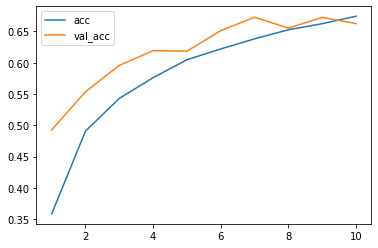

In [11]:
x=range(1,11)
plt.plot(x, history.history['accuracy'], label='acc')
plt.plot(x, history.history['val_accuracy'], label='val_acc')
plt.legend()

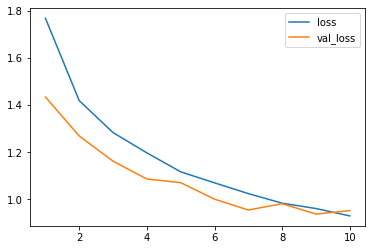

In [12]:
plt.plot(x, history.history['loss'], label='loss')
plt.plot(x, history.history['val_loss'], label='val_loss')
plt.legend()

Confusion matrix, without normalization
[[860  13  24  15  11   3   4   3  46  21]
 [ 17 902   3   2   0   2   3   0  14  57]
 [ 58   4 764  46  47  21  32  12  12   4]
 [ 25   4  68 668  39 110  41  13  21  11]
 [ 24   1  65  55 759  23  30  28  14   1]
 [ 16   5  51 162  23 684  20  20  12   7]
 [  8   5  43  57  16  15 846   1   7   2]
 [ 18   4  36  41  31  70   5 772   8  15]
 [ 49  16   6   4   3   2   2   1 893  24]
 [ 25  42   1   7   2   3   3   2  23 892]]


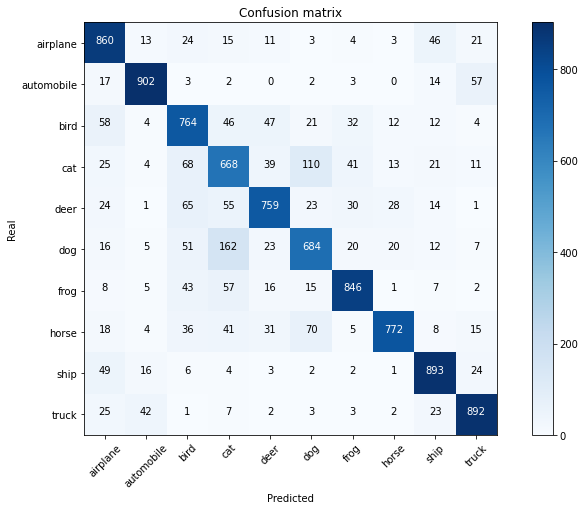

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
             'dog', 'frog', 'horse', 'ship', 'truck']

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Real')
  plt.xlabel('Predicted')
  plt.show()


p_test = model.predict(test_images).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
predictions = model.predict(test_images)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(30):
  print(predictions[i])
  print(test_labels[i])
  print(class_names[test_labels[i][0]])

[7.3274038e-08 2.0969603e-07 4.0001651e-06 9.9408239e-01 3.4617369e-07
 5.9072259e-03 5.6177137e-06 9.7161186e-09 8.1591224e-08 1.6693681e-09]
[3]
cat
[4.2347588e-06 1.0434759e-02 1.5779844e-12 2.1549247e-12 6.1678652e-13
 2.6670511e-14 1.9004297e-13 1.4445784e-15 9.8953104e-01 2.9981651e-05]
[8]
ship
[4.1391162e-05 1.9063991e-04 6.2379363e-10 7.7453155e-09 1.2656903e-10
 4.2459868e-12 1.0573207e-09 1.4872940e-10 9.9976391e-01 4.0599048e-06]
[8]
ship
[9.9257153e-01 7.7287123e-06 1.5173096e-03 1.7272256e-05 7.2049347e-06
 2.4432509e-07 9.7388022e-07 1.9821452e-06 5.5101938e-03 3.6560080e-04]
[0]
airplane
[1.4691849e-10 1.3132718e-06 1.1087698e-02 1.5882213e-02 1.6572777e-02
 5.9691601e-08 9.5645589e-01 4.6354722e-11 6.0381524e-08 4.1952233e-09]
[6]
frog
[2.1635796e-07 9.7948082e-08 5.9128193e-05 3.6709560e-03 1.0270091e-05
 4.7622799e-04 9.9578226e-01 2.6953595e-07 1.9098384e-07 4.6997417e-07]
[6]
frog
[1.01707534e-04 7.63800561e-01 1.15931362e-05 3.51867129e-05
 1.32489220e-07 4.404557